In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
# loading the dataset to pandas Dataform
loan_dataset = pd.read_csv('train.csv')

In [4]:
loan_dataset.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# deleting the missing values
loan_dataset = loan_dataset.dropna()

In [7]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [9]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [10]:
# replacing value,of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace = '3+', value=4)

In [11]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

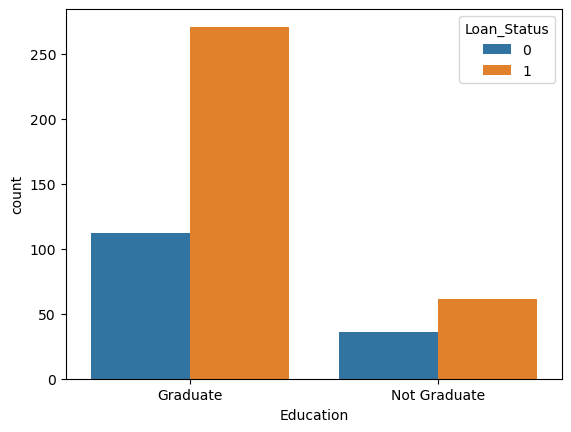

In [12]:
# education and loan status
sb.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

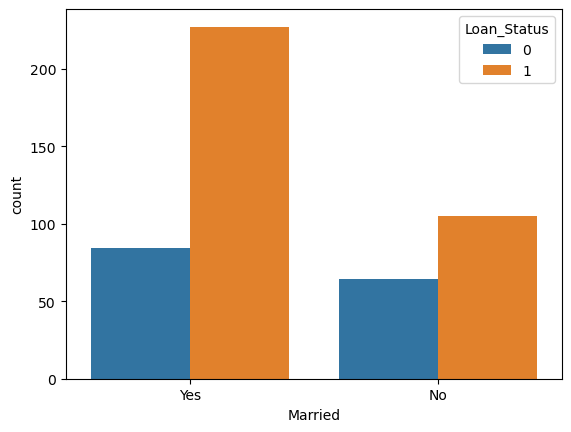

In [13]:
sb.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [14]:
# converting categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [15]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [16]:
#seprating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [17]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:  
Spport vector machine model

In [20]:
classifier=svm.SVC(kernel='linear')

In [21]:
#training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model evaluation


In [23]:
#accuracy score onl training data
x_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(x_train_prediction,Y_train)

In [24]:
print("Accuracy on training data :  ",training_data_accuracy)

Accuracy on training data :   0.7986111111111112


In [25]:
#accuracy score onl test data
x_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)

In [1]:
print("Accuracy on test data :  ",test_data_accuracy)

NameError: name 'test_data_accuracy' is not defined

BY MULTIPAL LINEAR REGRATION 

In [4]:
import matplotlib.pyplot as plt
import pandas 
import numpy
from scipy import stats
import statsmodels.api
from sklearn import linear_model
from sklearn import datasets
import seaborn as sns

In [5]:
data=pandas.read_csv("train.csv")
dataframe=pandas.DataFrame(data)
print(dataframe)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [6]:
# number of missing values in each column
dataframe.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#CHANGING LOAN STATUS IF LOAN IS GRANTED ITS 1 AND 0 FOR NOT GRANTING LOAN
dataframe.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [8]:
#PRINTING DATAFRAME
print(dataframe)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [9]:
#DROPING NULL VALUE COLOMN
dataframe=dataframe.dropna()

In [10]:
dataframe.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
dataframe['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
# replacing value,of 3+ to 4
dataframe= dataframe.replace(to_replace = '3+', value=4)

In [13]:
dataframe['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [14]:
# converting categorical columns to numerical values
dataframe.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [15]:
print(dataframe)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
5    LP001011       1        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1          4          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

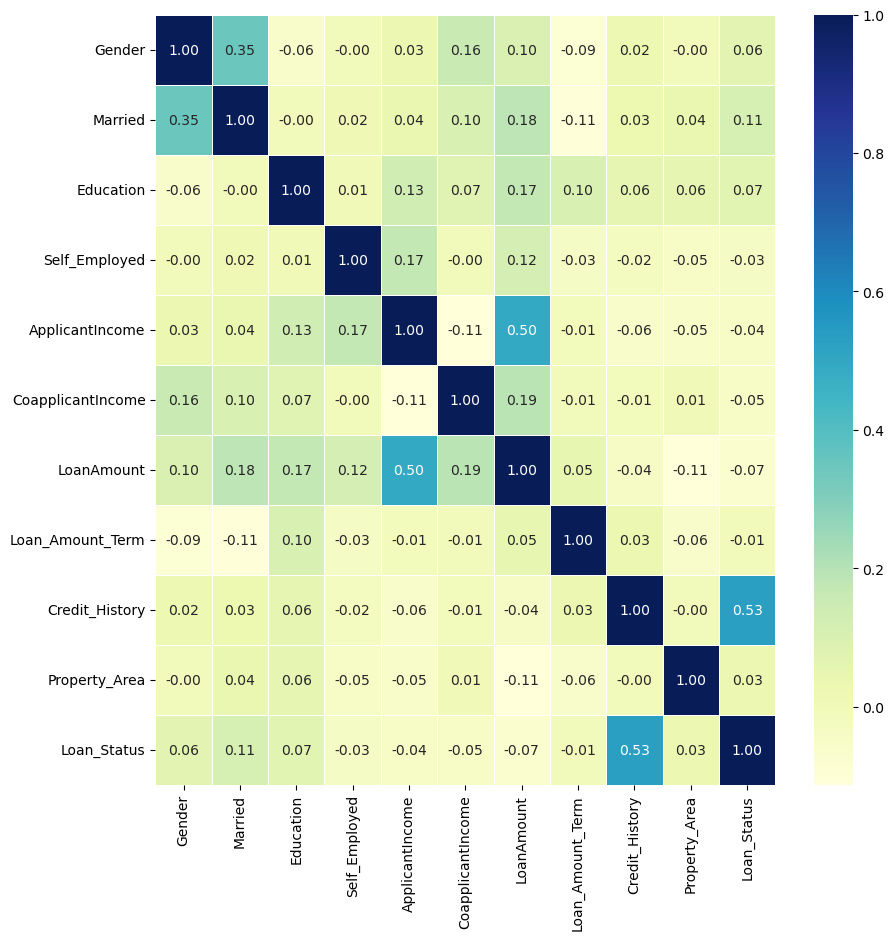

In [16]:
#PRINTING HEAT MAP FOR GETTING DEPENDENT VALUE
corr_matrix = dataframe.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,annot=True,lw=0.5,fmt=".2f",cmap="YlGnBu")


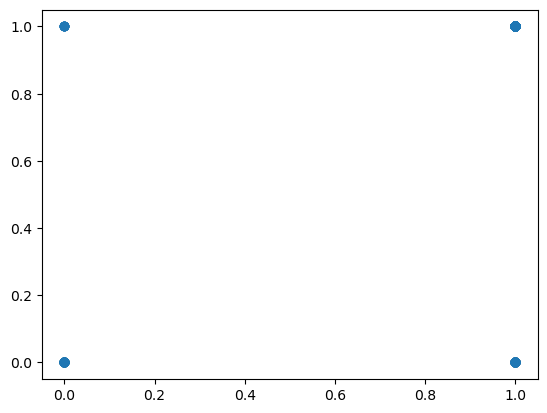

In [17]:
#FROM HEAT MAP WE CAN SEE LOAN STATUS HIGHLY DEPENDENT ON CREADIT HISTRY
plt.scatter(dataframe["Credit_History"],dataframe["Loan_Status"])
plt.show()

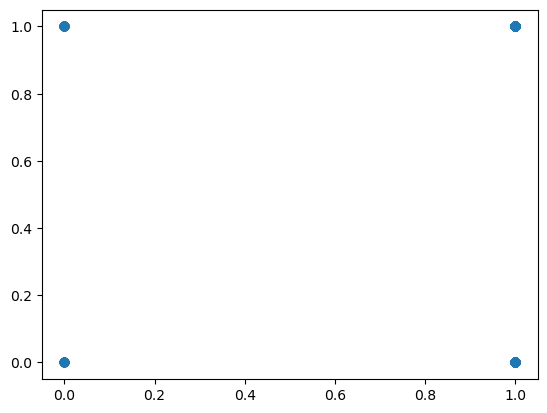

In [19]:
#from heatmap we can see it is also depentent on its maried or not
plt.scatter(dataframe["Education"],dataframe["Loan_Status"])
plt.show()

In [21]:
model=linear_model.LinearRegression()
model.fit(dataframe[["Credit_History","Married","Education","Property_Area"]],dataframe["Loan_Status"])
x=dataframe[["Credit_History","Married","Education","Property_Area"]]
y=dataframe["Loan_Status"]

In [22]:
X_train,X_test = train_test_split(dataframe,test_size=1,random_state=2)

In [23]:
print(X_test.shape)

(1, 13)


In [24]:
model.predict([[1,0,1,1]])

C:\Users\Parth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.73989342])

BY Random Forest Regression

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

In [28]:
#seprating the data and label
X = dataframe.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = dataframe['Loan_Status']

In [29]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [31]:
randforest = RandomForestRegressor()
randforest.fit(X_train, Y_train)

RandomForestRegressor()

In [32]:
y1_pred = randforest.predict(X_test)

In [33]:
print(y1_pred)

[0.78 0.72 0.79 0.75 0.98 0.93 0.84 0.67 1.   0.65 0.98 0.8  0.98 0.9
 0.94 0.72 1.   0.52 0.56 0.03 0.9  0.75 0.02 0.74 0.04 0.02 0.88 0.93
 0.   0.04 0.81 0.57 0.63 0.97 0.96 0.03 0.57 0.99 0.73 0.53 0.78 0.93
 0.57 0.77 0.62 0.93 0.87 0.4 ]


In [34]:
print(Y_test)

368    1
74     1
135    0
53     0
96     1
388    1
345    1
8      1
549    1
99     1
49     1
513    0
43     1
92     1
555    1
609    1
221    1
454    1
607    1
179    0
277    1
488    1
150    0
585    0
168    0
267    1
543    1
520    1
22     0
69     0
91     1
250    0
416    0
154    1
415    1
291    0
253    1
97     1
393    1
399    0
537    1
15     1
469    0
371    1
300    0
189    1
224    1
201    1
Name: Loan_Status, dtype: int64


BY Decision Tree Regression

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [63]:
#seprating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [64]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [66]:
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [67]:
y_pred = tree_reg.predict(X_test)

In [68]:
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


by Lasso Regression

In [94]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [102]:
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.3)

In [103]:
y_pred = lasso.predict(X_test)


In [104]:
print(y_pred)

[0.69367218 0.682126   0.62231037 0.70794115 0.69798677 0.69788006
 0.69158741 0.69168511 0.70528894 0.69321216 0.69230913 0.68564684
 0.69438656 0.711937   0.72375048 0.72732444 0.70245644 0.71262286
 0.69504568 0.71213874 0.71608053 0.68824427 0.70700633 0.68024228
 0.73102921 0.69074049 0.69928806 0.72380928 0.70511028 0.70836076
 0.65349994 0.67494899 0.70755189 0.7311987  0.72960643 0.71016562
 0.63288802 0.72817621 0.70939109 0.71192742 0.71698458 0.70909232
 0.69808929 0.70148844 0.70590975 0.68227258 0.70476596 0.69967297]


In [105]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.214163363379376


In [36]:
print(Y_test)

368    1
74     1
135    0
53     0
96     1
388    1
345    1
8      1
549    1
99     1
49     1
513    0
43     1
92     1
555    1
609    1
221    1
454    1
607    1
179    0
277    1
488    1
150    0
585    0
168    0
267    1
543    1
520    1
22     0
69     0
91     1
250    0
416    0
154    1
415    1
291    0
253    1
97     1
393    1
399    0
537    1
15     1
469    0
371    1
300    0
189    1
224    1
201    1
Name: Loan_Status, dtype: int64
